<a href="https://colab.research.google.com/github/Aryan-401/GoogleColabProjects/blob/main/MNSIT_Feed_Forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
#hyper parameters
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
#MNSIT
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#MNSIT
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform = transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)

In [ ]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


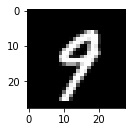

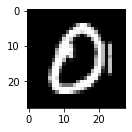

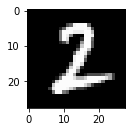

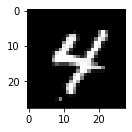

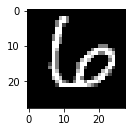

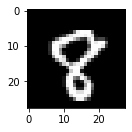

In [ ]:
 for i in range(6):
   plt.subplot(2,3, i+1)
   plt.imshow(samples[i][0], cmap='gray')
   plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate, )

In [ ]:
n_total_steps = len(train_loader)

# Move model and optimizer to device
model.to(device)
optimiser

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    # backward
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if (i+1)%100 == 0:
      print(f'epoch #{epoch+1}/{num_epochs} | Step:{(i+1)}/{n_total_steps} | Loss:{loss.item():.4f}')

epoch #1/2 | Step:100/600 | Loss:0.1036
epoch #1/2 | Step:200/600 | Loss:0.1343
epoch #1/2 | Step:300/600 | Loss:0.2139
epoch #1/2 | Step:400/600 | Loss:0.1009
epoch #1/2 | Step:500/600 | Loss:0.0783
epoch #1/2 | Step:600/600 | Loss:0.1251
epoch #2/2 | Step:100/600 | Loss:0.0803
epoch #2/2 | Step:200/600 | Loss:0.0370
epoch #2/2 | Step:300/600 | Loss:0.0353
epoch #2/2 | Step:400/600 | Loss:0.0428
epoch #2/2 | Step:500/600 | Loss:0.0464
epoch #2/2 | Step:600/600 | Loss:0.1002


In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, pred = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (pred == labels).sum().item()

  accuracy = (n_correct/n_samples)*100
  print(f"Accuracy: {accuracy:.4f}%")

Accuracy: 96.6100%
